<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/Colorjittering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

data = torch.outer(torch.ones(5), torch.arange(5))
print(data)

tensor([[0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.]])


In [5]:
print(torch.diagonal(data).add(-1).pow(2).sum())
print(data)

tensor(15.)
tensor([[0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.]])


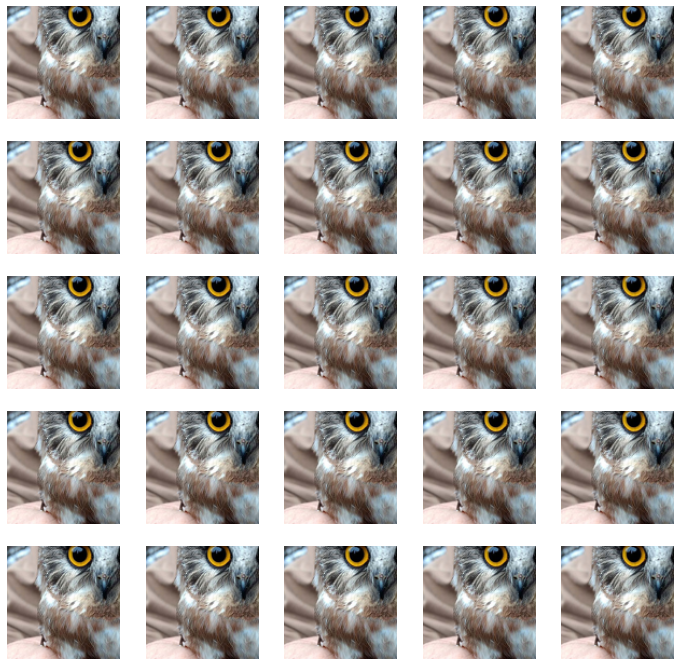

In [29]:
import torchvision.transforms as transforms
from PIL import Image, ImageFilter, ImageOps
import random

import matplotlib.pyplot as plt
image_url = "https://static.wixstatic.com/media/78ab91_e55452455df64179af5a1245aa543e5b~mv2.jpg/v1/fill/w_640,h_568,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/78ab91_e55452455df64179af5a1245aa543e5b~mv2.jpg"
import requests
from io import BytesIO

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
class GaussianBlur(object):
  """
  Apply Gaussian blur with a certain probability p.
  """
  def __init__(self, p):
      self.p = p

  def __call__(self, img):
      if random.random() < self.p:
          sigma = (random.random() * 1.9 + 0.1)/10
          return img.filter(ImageFilter.GaussianBlur(sigma))
      else:
          return img

t = transforms.Compose([
            transforms.CenterCrop((224,224)),
            transforms.Resize((105,105), interpolation=Image.BICUBIC),
            #transforms.RandomHorizontalFlip(p=0.5),
            #transforms.RandomApply([transforms.ColorJitter(brightness=(0.65,1.35), contrast=(0.65,1.35), saturation=(0.65,1.35), hue=(-0.3,0.3))], p=0.7),
            #transforms.Grayscale(),
            GaussianBlur(p=0.7),
            #Solarization(p=0.0),
            transforms.ToTensor(),
            #transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.243, 0.261])
            ])

plt.figure(figsize=[12,12])
for i in range(25):
    plt.subplot(5,5,i+1)
    image = t(img)
    plt.imshow(image.transpose(0, 1).transpose(1, 2).squeeze().numpy())#
    plt.axis("off")
plt.show()